# Ridge regression and Random forest regression

#### Import necessary packages

In [227]:
import warnings
warnings.filterwarnings('ignore')
from pandas import DatetimeIndex
from pandas import Timestamp
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import asarray
import datetime as dt
from datetime import timedelta
import time
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
import plotly.express as px

#### Read in the dataset and sort by date

In [228]:
df = pd.read_csv("United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")
df["submission_date"] = pd.to_datetime(df["submission_date"])
df = df.sort_values(by="submission_date")

## Ridge regression

#### Filtering out the data in desired range

In [150]:
start_date = '2020-12-14'
end_date = '2021-11-19'

In [151]:
mask = (df['submission_date'] >= start_date) & (df['submission_date'] <= end_date)
df = df.loc[mask]

#### Define few functions for further use.

In [152]:
def split_train_test(n, df):
    train = df.iloc[:int(df.shape[0]*n)]
    valid = df.iloc[int(df.shape[0]*n):]
    return train, valid

In [153]:
def plot_result(data,new_date_time_index, forecast, gcolor, gcase, gtitle):
    plt.plot(data,label="Actual "+gcase,color=gcolor, linestyle='solid', linewidth = 1, marker='o', markerfacecolor=gcolor, markersize=1)
    plt.plot(new_date_time_index,forecast,label="Predicted "+gcase,color='black', linestyle='solid', linewidth = 1, marker='*', markerfacecolor='black', markersize=1)


In [229]:
def new_forecast(prediction,new_prediction,new_date):
    
    forecast=np.concatenate((prediction,new_prediction))

    new_ar = []

    for single_timestamp in datewise_state.index:
        new_ar.append(pd.to_datetime(single_timestamp))

    for single_timestamp in new_date:
        new_ar.append(pd.to_datetime(single_timestamp))

    new_date_time_index = DatetimeIndex(new_ar, dtype='datetime64[ns]', name='Date', freq=None)

    return (forecast,new_date_time_index)

In [155]:
def eval_reg(y,y_p):
    print("Mean Absolute Error: ",mean_absolute_error(y,y_p))
    print("R2-Squared:", r2_score(y,y_p))

In [157]:
def RidgeRegression_covid_19(aph,train,valid,data,case, datewise_state):
    model_scores=[]

    rf=Ridge(alpha=aph)
    rf.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train).reshape(-1,1))
    
    prediction_valid_rf=rf.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
    model_scores.append(np.sqrt(mean_squared_error(valid,prediction_valid_rf)))
    print("RMSE for Ridge Regression Regression: ",model_scores)

    prediction_rf=rf.predict(np.array(datewise_state["Days Since"]).reshape(-1,1))

    new_date=[]
    new_prediction_rf=[]
    
    eval_reg(valid,prediction_valid_rf) 

    for i in range(1,8):
        new_date.append(datewise_state.index[-1]+timedelta(days=i))
        new_prediction_rf.append(rf.predict(np.array(datewise_state["Days Since"].max()+i).reshape(-1,1))[0]) 
 
    forecast_rf, new_date_time_index =new_forecast(prediction_rf,new_prediction_rf,new_date)
    plot_result(data,new_date_time_index, forecast_rf,'blue', case, 'Ridge Regression Regression Prediction')

    return (forecast_rf, new_date_time_index,model_scores)
    

### Building ridge regression model for California

In [216]:
df_state_ca = df[df["state"] =='CA']
datewise_ca=df_state_ca.groupby(["submission_date"]).agg({"tot_cases":'sum',"tot_death":'sum'})


In [159]:
datewise_ca["Days Since"] = datewise_ca.index-datewise_ca.index[0]
datewise_ca["Days Since"] = datewise_ca["Days Since"].dt.days
datewise_ca

,tot_cases,tot_death,Days Since
submission_date,,,
2020-12-14,1585044,21088,0
2020-12-15,1617370,21178,1
2020-12-16,1671081,21410,2
2020-12-17,1723362,21817,3
2020-12-18,1764374,22080,4
...,...,...,...
2021-11-15,4992875,72570,336
2021-11-16,4997390,72590,337
2021-11-17,5001302,72718,338


### Split the data set into training and testing by 80:20

In [160]:
train_ml_ca, valid_ml_ca = split_train_test(0.8, datewise_ca)

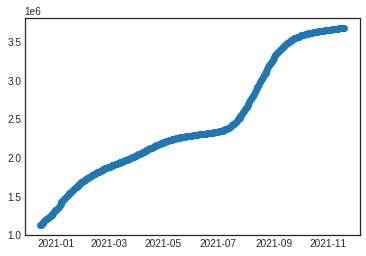

In [161]:

plt.scatter(df_state_case["submission_date"], df_state_case["tot_cases"])
plt.show()

RMSE for Ridge Regression Regression:  [132687.1061091103]
Mean Absolute Error:  132390.1686492473
R2-Squared: 0.015833285852311363


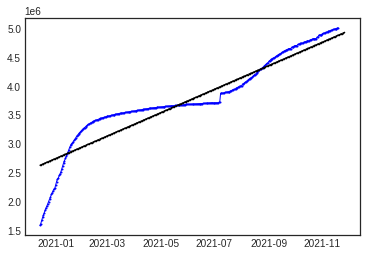

In [162]:

forecast_r_ca, new_date_time_index_ca, model_score_r_ca = RidgeRegression_covid_19(20,train_ml_ca["tot_cases"],valid_ml_ca["tot_cases"],datewise_ca["tot_cases"],'Confirmed Cases',datewise_ca)


#### One week predictions for California

In [218]:
forecast_r_ca[-7:]

4913282.596005402

#### Average value for prediction for the next week in California

In [224]:
np.mean(forecast_r_ca[-7:])

4913282.596005402

The predicted average total cases for California in the next 7 days after November 19th is 4913282.596.

### Building model for Florida

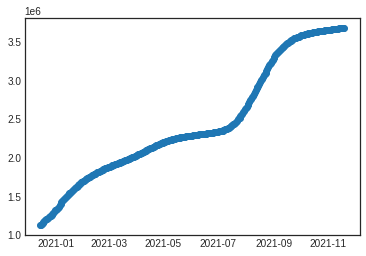

In [164]:
df_state_fl = df[df["state"] == 'FL']
plt.scatter(df_state_fl["submission_date"], df_state_fl["tot_cases"])
plt.show()

In [165]:
datewise_fl = df_state_fl.groupby(["submission_date"]).agg({"tot_cases":'sum',"tot_death":'sum'})

,tot_cases,tot_death
submission_date,,
2020-12-14,1122656,21409
2020-12-15,1133968,21524
2020-12-16,1146807,21630
2020-12-17,1159721,21745
2020-12-18,1171104,21860
...,...,...
2021-11-15,3672616,61074
2021-11-16,3674329,61078
2021-11-17,3676337,61080


In [166]:
datewise_fl["Days Since"] = datewise_fl.index-datewise_fl.index[0]
datewise_fl["Days Since"] = datewise_fl["Days Since"].dt.days
datewise_fl
train_ml_fl, valid_ml_fl = split_train_test(0.8, datewise_fl)

RMSE for Ridge Regression Regression:  [362609.5535802476]
Mean Absolute Error:  355831.9658269108
R2-Squared: -31.073739984834212


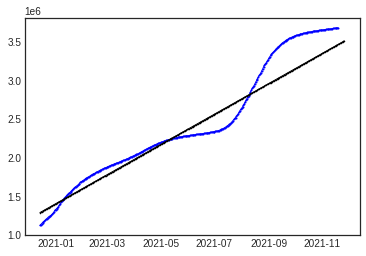

In [167]:
forecast_r_fl, new_date_time_index_fl, model_score_r_fl = RidgeRegression_covid_19(20,train_ml_fl["tot_cases"],valid_ml_fl["tot_cases"],datewise_fl["tot_cases"],'Confirmed Cases', datewise_fl)


#### Prediction for the next week in Florida

In [225]:
forecast_r_fl[-7:]

array([[3470330.84849097],
       [3476729.63614643],
       [3483128.42380189],
       [3489527.21145735],
       [3495925.99911281],
       [3502324.78676827],
       [3508723.57442373]])

#### Average value for prediction for the next week in Florida

In [220]:
np.mean(forecast_r_fl[-7:])

3489527.211457348

The predicted average total cases for Florida in the next 7 days after November 19th is 3489527.211.

### Building model for Texas

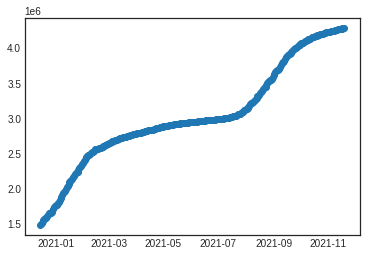

In [169]:
df_state_tx = df[df["state"] == 'TX']
plt.scatter(df_state_tx["submission_date"], df_state_tx["tot_cases"])
plt.show()

In [170]:
datewise_tx = datewise_tx.groupby(["submission_date"]).agg({"tot_cases":'sum',"tot_death":'sum'})

,tot_cases,tot_death
submission_date,,
2020-12-14,1482141,27183
2020-12-15,1500538,27402
2020-12-16,1519340,27616
2020-12-17,1539189,27851
2020-12-18,1555981,28096
...,...,...
2021-11-15,4268082,71633
2021-11-16,4272442,71722
2021-11-17,4277364,71844


In [171]:
datewise_tx["Days Since"] = datewise_tx.index-datewise_tx.index[0]
datewise_tx["Days Since"] = datewise_tx["Days Since"].dt.days
datewise_tx
train_ml_tx, valid_ml_tx = split_train_test(0.8, datewise_tx)

#### One week predictions for Texas

RMSE for Ridge Regression Regression:  [360739.008769759]
Mean Absolute Error:  358889.2838986177
R2-Squared: -6.605392141677496


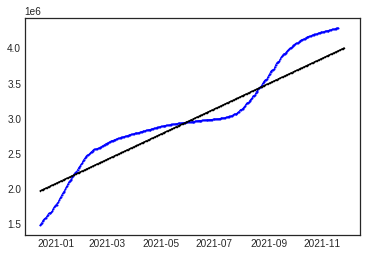

In [172]:
forecast_r_tx, new_date_time_index_tx, model_score_r_tx = RidgeRegression_covid_19(20,train_ml_tx["tot_cases"],valid_ml_tx["tot_cases"],datewise_tx["tot_cases"],'Confirmed Cases', datewise_tx)


#### Average value for prediction for the next week in Texas

In [219]:
np.mean(forecast_r_tx[-7:])

3984442.8460686724

The predicted average total cases for Texas in the next 7 days after November 19th is 3984442.846.

# Random forest models

## Define some functions for random forest for later use

In [175]:
# split a dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

In [187]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [176]:
# fit random forest model
def random_forest_forecast(train, testX):
    train = asarray(train)
    trainX, trainy = train[:, :-1], train[:, -1]
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    yhat = model.predict([testX])
    return yhat[0]

In [230]:
# walk-forward validation
def walk_forward_validation(data, n_test):
    predictions = list()
    train, test = train_test_split(data, n_test)
    history = [x for x in train]
    for i in range(len(test)):
        testX, testy = test[i, :-1], test[i, -1]
        yhat = random_forest_forecast(history, testX)
        predictions.append(yhat)
        history.append(test[i])
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    error = mean_absolute_error(test[:, -1], predictions)
    print(predictions)
    return error, test[:, -1], predictions

The R^2 for the ridge regression are not very high. The value for FLorida and Texas are negative, indicating the model does not have a good fit.

## Random forest model for California

In [178]:
# load the dataset
series_ca  = df_state_ca[['tot_cases']]
values_ca = series_ca.values

>expected=4937188.0, predicted=4932200.4
>expected=4937188.0, predicted=4935532.8
>expected=4956081.0, predicted=4936692.6
>expected=4960026.0, predicted=4949281.5
>expected=4963742.0, predicted=4955683.5
>expected=4972469.0, predicted=4960634.1
>expected=4972469.0, predicted=4967925.9
>expected=4984465.0, predicted=4970874.9
>expected=4984465.0, predicted=4979996.6
>expected=4992875.0, predicted=4982649.1
>expected=4997390.0, predicted=4989051.0
>expected=5001302.0, predicted=4994089.6
>expected=5009101.0, predicted=4998785.6
>expected=5014428.0, predicted=5005544.6
[4932200.403, 4935532.799, 4936692.647, 4949281.463, 4955683.496, 4960634.143, 4967925.924, 4970874.919, 4979996.582, 4982649.143, 4989051.028, 4994089.569, 4998785.575, 5005544.616]
MAE: 8874.764


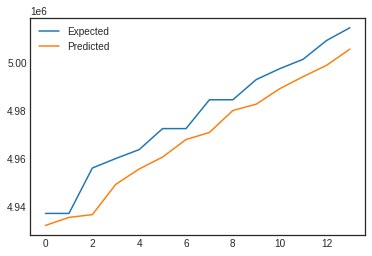

In [211]:
# transform the time series data into supervised learning
data_ca = series_to_supervised(values_ca, n_in=6)

# evaluate
mae, y, yhat = walk_forward_validation(data_ca, 14)

print('MAE: %.3f' % mae)

# plot expected vs predicted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

In [180]:
# evaluate the model
eval_reg(y, yhat)

Mean Absolute Error:  8870.10578571433
R2-Squared: 0.8280642147192246


### Predict new total case number 

In [213]:
# transform the time series data into supervised learning
train_ca = series_to_supervised(values_ca, n_in=6)

# split into input and output columns
trainX, trainy = train_ca[:, :-1], train_ca[:, -1]

# fit model 
model = RandomForestRegressor(n_estimators=10000)

model.fit(trainX, trainy)
# construct an input for a new prediction
row = values_ca[-6:].flatten()

In [214]:
for i in range(15):
    row=row[-6:]
    print('Input: %s, Predicted: %.3f' % (row, model.predict(asarray([row]))[0]))
    row = np.append(row, model.predict(asarray([row]))[0])

Input: [4984465 4992875 4997390 5001302 5009101 5014428], Predicted: 5011117.356
Input: [4992875.     4997390.     5001302.     5009101.     5014428.
 5011117.3563], Predicted: 5011117.356
Input: [4997390.     5001302.     5009101.     5014428.     5011117.3563
 5011117.3563], Predicted: 5011117.356
Input: [5001302.     5009101.     5014428.     5011117.3563 5011117.3563
 5011117.3563], Predicted: 5011117.356
Input: [5009101.     5014428.     5011117.3563 5011117.3563 5011117.3563
 5011117.3563], Predicted: 5011117.356
Input: [5014428.     5011117.3563 5011117.3563 5011117.3563 5011117.3563
 5011117.3563], Predicted: 5011117.356
Input: [5011117.3563 5011117.3563 5011117.3563 5011117.3563 5011117.3563
 5011117.3563], Predicted: 5011117.356
Input: [5011117.3563 5011117.3563 5011117.3563 5011117.3563 5011117.3563
 5011117.3563], Predicted: 5011117.356
Input: [5011117.3563 5011117.3563 5011117.3563 5011117.3563 5011117.3563
 5011117.3563], Predicted: 5011117.356
Input: [5011117.3563 501111

#### Plot for the predicted and forcast values

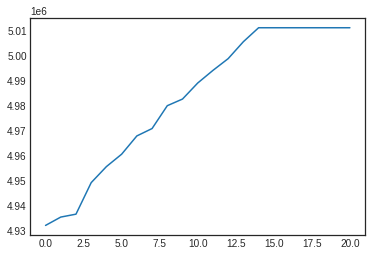

In [215]:
yhat_plot = np.append(yhat, row)
plt.plot(yhat_plot, label='Forecast')

The predicted total case for California in the next 7 days is 5011117.356.

### Finding the nodes
Our random forest model has an issue of predicting the same values for every single day.
The largest value of your threshold is not able to split the 2 values you are trying to predict,
hence they will always end up in the same nodes, giving you the same prediction.

In [184]:
threshold = np.unique([j for i in model.estimators_ for j in i.tree_.threshold])

In [185]:
np.sort(threshold)[-10:]

array([4990785. , 4990927.5, 4992883.5, 4995132.5, 4996783. , 4997088.5,
       4999346. , 5000988. , 5003245.5, 5005201.5])

Since the largest value of your threshold is not able to split the the values at the last node,
it always end up in the same node, giving the same prediction. Same issue happens for the fllowing states as well.

## Random forest model for Florida

In [193]:
# load the dataset
series_fl  = df_state_fl[['tot_cases']]
values_fl = series_fl.values

# transform the time series data into supervised learning
data_fl = series_to_supervised(values_fl, n_in=6)

# evaluate
mae, y, yhat = walk_forward_validation(data_fl, 14)

print('MAE: %.3f' % mae)

>expected=3659501.0, predicted=3657004.5
>expected=3659772.0, predicted=3658661.7
>expected=3661582.0, predicted=3659352.9
>expected=3663096.0, predicted=3660693.4
>expected=3665628.0, predicted=3662216.6
>expected=3667139.0, predicted=3664390.0
>expected=3668749.0, predicted=3666121.1
>expected=3669896.0, predicted=3667800.6
>expected=3670931.0, predicted=3669130.6
>expected=3672616.0, predicted=3670245.6
>expected=3674329.0, predicted=3671767.3
>expected=3676337.0, predicted=3673451.7
>expected=3677967.0, predicted=3675303.8
>expected=3679548.0, predicted=3677013.9
[3657004.508, 3658661.713, 3659352.907, 3660693.363, 3662216.576, 3664389.957, 3666121.074, 3667800.607, 3669130.613, 3670245.586, 3671767.262, 3673451.682, 3675303.815, 3677013.917]
MAE: 2424.101


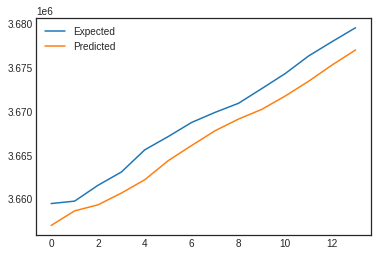

In [194]:
# plot expected vs predicted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

#### Evaluate the model

In [226]:
eval_reg(y, yhat)

Mean Absolute Error:  8874.763785714216
R2-Squared: 0.8280133200162414


In [186]:
# transform the time series data into supervised learning
data_fl = series_to_supervised(values_ca, n_in=6)
# evaluate
mae, y, yhat = walk_forward_validation(data_fl, 14)
print('MAE: %.3f' % mae)

>expected=4937188.0, predicted=4932127.1
>expected=4937188.0, predicted=4935484.0
>expected=4956081.0, predicted=4936511.0
>expected=4960026.0, predicted=4949279.8
>expected=4963742.0, predicted=4955932.8
>expected=4972469.0, predicted=4960723.9
>expected=4972469.0, predicted=4968587.1
>expected=4984465.0, predicted=4971022.6
>expected=4984465.0, predicted=4979399.5
>expected=4992875.0, predicted=4982290.9
>expected=4997390.0, predicted=4989324.8
>expected=5001302.0, predicted=4994470.2
>expected=5009101.0, predicted=4998506.8
>expected=5014428.0, predicted=5005227.6
[4932127.143, 4935484.013, 4936511.011, 4949279.809, 4955932.765, 4960723.899, 4968587.143, 4971022.585, 4979399.512, 4982290.913, 4989324.758, 4994470.2, 4998506.826, 5005227.626]
MAE: 8878.628


### Predict on new date

In [198]:
# transform the time series data into supervised learning
train_fl = series_to_supervised(values_fl, n_in=6)

# split into input and output columns
trainX, trainy = train_fl[:, :-1], train_fl[:, -1]

# fit model 
model = RandomForestRegressor(n_estimators=10000)

model.fit(trainX, trainy)
# construct an input for a new prediction
row = values_fl[-6:].flatten()

In [199]:
for i in range(15):
    row=row[-6:]
    print('Input: %s, Predicted: %.3f' % (row, model.predict(asarray([row]))[0]))
    row = np.append(row, model.predict(asarray([row]))[0])

Input: [3670931 3672616 3674329 3676337 3677967 3679548], Predicted: 3678600.730
Input: [3672616.     3674329.     3676337.     3677967.     3679548.
 3678600.7296], Predicted: 3678600.730
Input: [3674329.     3676337.     3677967.     3679548.     3678600.7296
 3678600.7296], Predicted: 3678600.730
Input: [3676337.     3677967.     3679548.     3678600.7296 3678600.7296
 3678600.7296], Predicted: 3678600.730
Input: [3677967.     3679548.     3678600.7296 3678600.7296 3678600.7296
 3678600.7296], Predicted: 3678600.730
Input: [3679548.     3678600.7296 3678600.7296 3678600.7296 3678600.7296
 3678600.7296], Predicted: 3678600.730
Input: [3678600.7296 3678600.7296 3678600.7296 3678600.7296 3678600.7296
 3678600.7296], Predicted: 3678600.730
Input: [3678600.7296 3678600.7296 3678600.7296 3678600.7296 3678600.7296
 3678600.7296], Predicted: 3678600.730
Input: [3678600.7296 3678600.7296 3678600.7296 3678600.7296 3678600.7296
 3678600.7296], Predicted: 3678600.730
Input: [3678600.7296 367860

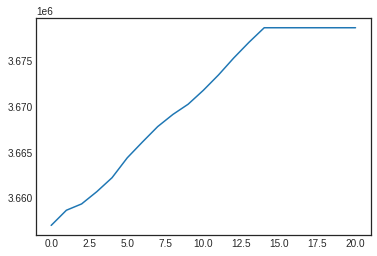

In [201]:
yhat_plot = np.append(yhat, row)
plt.plot(yhat_plot, label='Forecast')

The predicted total case for Florida in the next 7 days is 3678600.730.

## Random forest model for Texas

In [202]:
# load the dataset
series_tx  = df_state_tx[['tot_cases']]
values_tx = series_tx.values

# transform the time series data into supervised learning
data_tx = series_to_supervised(values_tx, n_in=6)

# evaluate
mae, y, yhat = walk_forward_validation(data_tx, 14)

print('MAE: %.3f' % mae)

>expected=4243143.0, predicted=4238085.7
>expected=4244349.0, predicted=4241266.3
>expected=4245949.0, predicted=4243265.5
>expected=4251485.0, predicted=4244959.2
>expected=4255280.0, predicted=4249102.4
>expected=4259194.0, predicted=4253087.4
>expected=4262152.0, predicted=4256857.3
>expected=4266084.0, predicted=4260284.5
>expected=4266698.0, predicted=4264123.5
>expected=4268082.0, predicted=4265674.1
>expected=4272442.0, predicted=4267140.3
>expected=4277364.0, predicted=4270620.6
>expected=4282152.0, predicted=4274952.3
>expected=4286622.0, predicted=4279324.0
[4238085.664, 4241266.299, 4243265.505, 4244959.239, 4249102.421, 4253087.372, 4256857.272, 4260284.546, 4264123.461, 4265674.146, 4267140.339, 4270620.586, 4274952.26, 4279324.018]
MAE: 5160.919


#### Plot expected vs predicted

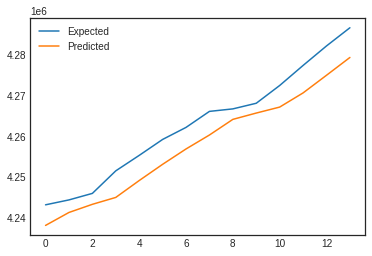

In [203]:
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

#### Evaluate the model

In [204]:
eval_reg(y, yhat)

Mean Absolute Error:  5160.91942857146
R2-Squared: 0.8353895233136869


In [205]:
# transform the time series data into supervised learning
data_tx = series_to_supervised(values_tx, n_in=6)
mae, y, yhat = walk_forward_validation(data_tx, 14)
print('MAE: %.3f' % mae)

>expected=4243143.0, predicted=4238008.0
>expected=4244349.0, predicted=4241579.3
>expected=4245949.0, predicted=4243233.3
>expected=4251485.0, predicted=4244910.0
>expected=4255280.0, predicted=4249094.0
>expected=4259194.0, predicted=4252878.3
>expected=4262152.0, predicted=4256916.7
>expected=4266084.0, predicted=4260161.6
>expected=4266698.0, predicted=4264198.5
>expected=4268082.0, predicted=4265557.9
>expected=4272442.0, predicted=4267288.7
>expected=4277364.0, predicted=4270405.1
>expected=4282152.0, predicted=4274849.0
>expected=4286622.0, predicted=4279665.5
[4238007.984, 4241579.319, 4243233.28, 4244909.988, 4249094.043, 4252878.333, 4256916.651, 4260161.59, 4264198.539, 4265557.884, 4267288.719, 4270405.081, 4274848.962, 4279665.458]
MAE: 5160.726


### Predict on new date

In [208]:
# transform the time series data into supervised learning
train_tx = series_to_supervised(values_tx, n_in=6)

# split into input and output columns
trainX, trainy = train_tx[:, :-1], train_tx[:, -1]

# fit model 
model = RandomForestRegressor(n_estimators=10000)
model.fit(trainX, trainy)

# construct an input for a new prediction
row = values_tx[-6:].flatten()

Input: [4266698 4268082 4272442 4277364 4282152 4286622], Predicted: 4284003.455
Input: [4268082.     4272442.     4277364.     4282152.     4286622.
 4284003.4549], Predicted: 4284003.455
Input: [4272442.     4277364.     4282152.     4286622.     4284003.4549
 4284003.4549], Predicted: 4284003.455
Input: [4277364.     4282152.     4286622.     4284003.4549 4284003.4549
 4284003.4549], Predicted: 4284003.455
Input: [4282152.     4286622.     4284003.4549 4284003.4549 4284003.4549
 4284003.4549], Predicted: 4284003.455
Input: [4286622.     4284003.4549 4284003.4549 4284003.4549 4284003.4549
 4284003.4549], Predicted: 4284003.455
Input: [4284003.4549 4284003.4549 4284003.4549 4284003.4549 4284003.4549
 4284003.4549], Predicted: 4284003.455
Input: [4284003.4549 4284003.4549 4284003.4549 4284003.4549 4284003.4549
 4284003.4549], Predicted: 4284003.455
Input: [4284003.4549 4284003.4549 4284003.4549 4284003.4549 4284003.4549
 4284003.4549], Predicted: 4284003.455
Input: [4284003.4549 428400

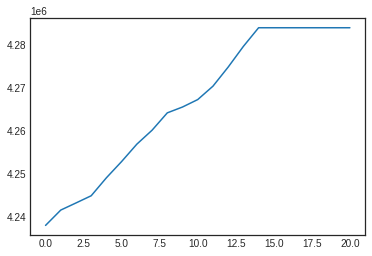

In [209]:
for i in range(15):
    row=row[-6:]
    print('Input: %s, Predicted: %.3f' % (row, model.predict(asarray([row]))[0]))
    row = np.append(row, model.predict(asarray([row]))[0])
yhat_plot = np.append(yhat, row)

plt.plot(yhat_plot, label='Forecast')

The predicted total case for Texas in the next 7 days is 4284003.455.

Although the R^2 values for the random forest for all three states have value higher than 0.8, the predicted value for the future 7 days does not seem reasonable. After printing out the values for our thresholds, we found that the value at the right node is unable to split the predicted value so they all ended up with the same value. 